In [1]:
%cd ..

/home/quasar/GitHub/TradeForecast


/home/quasar/GitHub/TradeForecast/.venv/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
from tradeforecast import Scrapper

ticker = 'AAPL'
scrapper = Scrapper(ticker)

exported_fname = scrapper.export_historic_data(interval='1d', period='max')

[*********************100%***********************]  1 of 1 completed


In [3]:
from tradeforecast.augmentation import DataEntryPoint, Indicators, FeatureEngg, RNNDataset, train_test_split
import polars as pl

data_entry = DataEntryPoint(exported_fname[ticker])

indicators = Indicators(data_entry)
indicators.add_moving_average().add_moving_average(ma_type='EMA').add_macd_sl().add_rsi().add_atr()

features = FeatureEngg(data_entry)
features.add_quarters().add_weeks().add_hours().add_minutes()

lf = data_entry.data.drop_nulls()
lf.collect()

Datetime,Close,High,Low,Open,Volume,SMA_close_9,EMA_close_9,MACD_close_12-26,MACD-SL_close_9,RSI_close_14,ATR_close_14,Quarter_sin,Quarter_cos,Week_sin,Week_cos,Hour_sin,Hour_cos,Minute_sin,Minute_cos
"datetime[μs, EST]",f64,f64,f64,f64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1981-01-29 19:00:00 EST,0.126116,0.127232,0.126116,0.127232,46188800,0.140563,0.137804,-0.001314,0.000148,23.832346,0.004126,1.0,0.0,0.558647,0.829406,-0.965926,0.258819,0.0,1.0
1981-02-01 19:00:00 EST,0.118862,0.11942,0.118862,0.11942,23766400,0.137959,0.134014,-0.002705,-0.000491,18.469055,0.004546,1.0,0.0,0.558647,0.829406,-0.965926,0.258819,0.0,1.0
1981-02-02 19:00:00 EST,0.123326,0.123884,0.123326,0.123326,19152000,0.135541,0.131876,-0.003426,-0.001133,29.702202,0.004609,1.0,0.0,0.652822,0.757511,-0.965926,0.258819,0.0,1.0
1981-02-03 19:00:00 EST,0.12779,0.128348,0.12779,0.12779,27865600,0.133433,0.131058,-0.003613,-0.001666,39.344816,0.004665,1.0,0.0,0.652822,0.757511,-0.965926,0.258819,0.0,1.0
1981-02-04 19:00:00 EST,0.12779,0.128906,0.12779,0.12779,7929600,0.131386,0.130404,-0.003719,-0.0021,39.344816,0.00419,1.0,0.0,0.652822,0.757511,-0.965926,0.258819,0.0,1.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2024-11-10 19:00:00 EST,224.229996,225.699997,221.5,225.0,42005600,225.085556,226.032422,-0.974856,-0.197665,40.395432,4.109383,-0.0,1.0,-0.812487,0.582979,-0.965926,0.258819,0.0,1.0
2024-11-11 19:00:00 EST,224.229996,225.589996,223.360001,224.550003,40398300,224.433333,225.671937,-1.091323,-0.376397,40.395432,3.858798,-0.0,1.0,-0.737833,0.674983,-0.965926,0.258819,0.0,1.0
2024-11-12 19:00:00 EST,225.119995,226.649994,222.759995,224.009995,48566200,224.345554,225.561548,-1.099138,-0.520945,44.504137,3.862958,-0.0,1.0,-0.737833,0.674983,-0.965926,0.258819,0.0,1.0


In [4]:
from torch.utils.data import DataLoader

dataset_kwargs = {'lf': lf,
                 'non_temporal': data_entry.non_temporal,
                 'temporal': data_entry.temporal,
                 'target': 'Close',
                 'look_back_len': 30,
                 'forecast_len': 5}

rnn_dataset = RNNDataset(**dataset_kwargs)

train_dataset, test_dataset = train_test_split(rnn_dataset, 0.05)
print(len(rnn_dataset), len(train_dataset), len(test_dataset))

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=False, drop_last=False)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False, drop_last=False)

10977 10429 548


In [5]:
from tradeforecast import LSTM
from torch import nn, optim

lstm_kwargs = {'input_size': len(rnn_dataset.features),
              'hidden_size': 32,
              'n_LSTM': 4,
              'bidirectional': True,
              'fc_out_size':[],
              'output_size': rnn_dataset.forecast_len,
              'dropout': 0}

lstm_model = LSTM(**lstm_kwargs)
print(f"The device is set to ---> '{lstm_model.device}'")

The device is set to ---> 'cuda'


In [6]:
lstm_model.train_model(nn.MSELoss, optim.SGD, 1500, train_loader, 0.001)

Epoch: [1/1500]; Loss: 3.500111
Epoch: [2/1500]; Loss: 3.436536
Epoch: [3/1500]; Loss: 3.379057
Epoch: [4/1500]; Loss: 3.326887
Epoch: [5/1500]; Loss: 3.279399
Epoch: [6/1500]; Loss: 3.236087
Epoch: [7/1500]; Loss: 3.196527
Epoch: [8/1500]; Loss: 3.160360
Epoch: [9/1500]; Loss: 3.127278
Epoch: [10/1500]; Loss: 3.097013
Epoch: [11/1500]; Loss: 3.069335
Epoch: [12/1500]; Loss: 3.044036
Epoch: [13/1500]; Loss: 3.020931
Epoch: [14/1500]; Loss: 2.999850
Epoch: [15/1500]; Loss: 2.980640
Epoch: [16/1500]; Loss: 2.963155
Epoch: [17/1500]; Loss: 2.947262
Epoch: [18/1500]; Loss: 2.932835
Epoch: [19/1500]; Loss: 2.919753
Epoch: [20/1500]; Loss: 2.907907
Epoch: [21/1500]; Loss: 2.897188
Epoch: [22/1500]; Loss: 2.887499
Epoch: [23/1500]; Loss: 2.878742
Epoch: [24/1500]; Loss: 2.870831
Epoch: [25/1500]; Loss: 2.863679
Epoch: [26/1500]; Loss: 2.857208
Epoch: [27/1500]; Loss: 2.851344
Epoch: [28/1500]; Loss: 2.846015
Epoch: [29/1500]; Loss: 2.841158
Epoch: [30/1500]; Loss: 2.836711
Epoch: [31/1500]; L

In [7]:
model_fname = lstm_model.save_model_state(ticker_interval='AAPL_1d_engg')
model_fname

'AAPL_1d_engg_biLSTM(88997,19,5)-cuda.pth'

In [8]:
from sklearn.metrics import mean_absolute_percentage_error
from torch import Tensor

y: Tensor; y_preds: Tensor
y, y_preds = lstm_model.test_model(test_loader)

y_arr, y_preds_arr = y.cpu().numpy(), y_preds.cpu().numpy()
print(y_arr.shape, y_preds_arr.shape)

y_arr = rnn_dataset.inverse_transform(y_arr)
y_preds_arr = rnn_dataset.inverse_transform(y_preds_arr)
mean_absolute_percentage_error(y_arr, y_preds_arr)

(548, 5) (548, 5)


np.float64(0.12983329052969853)

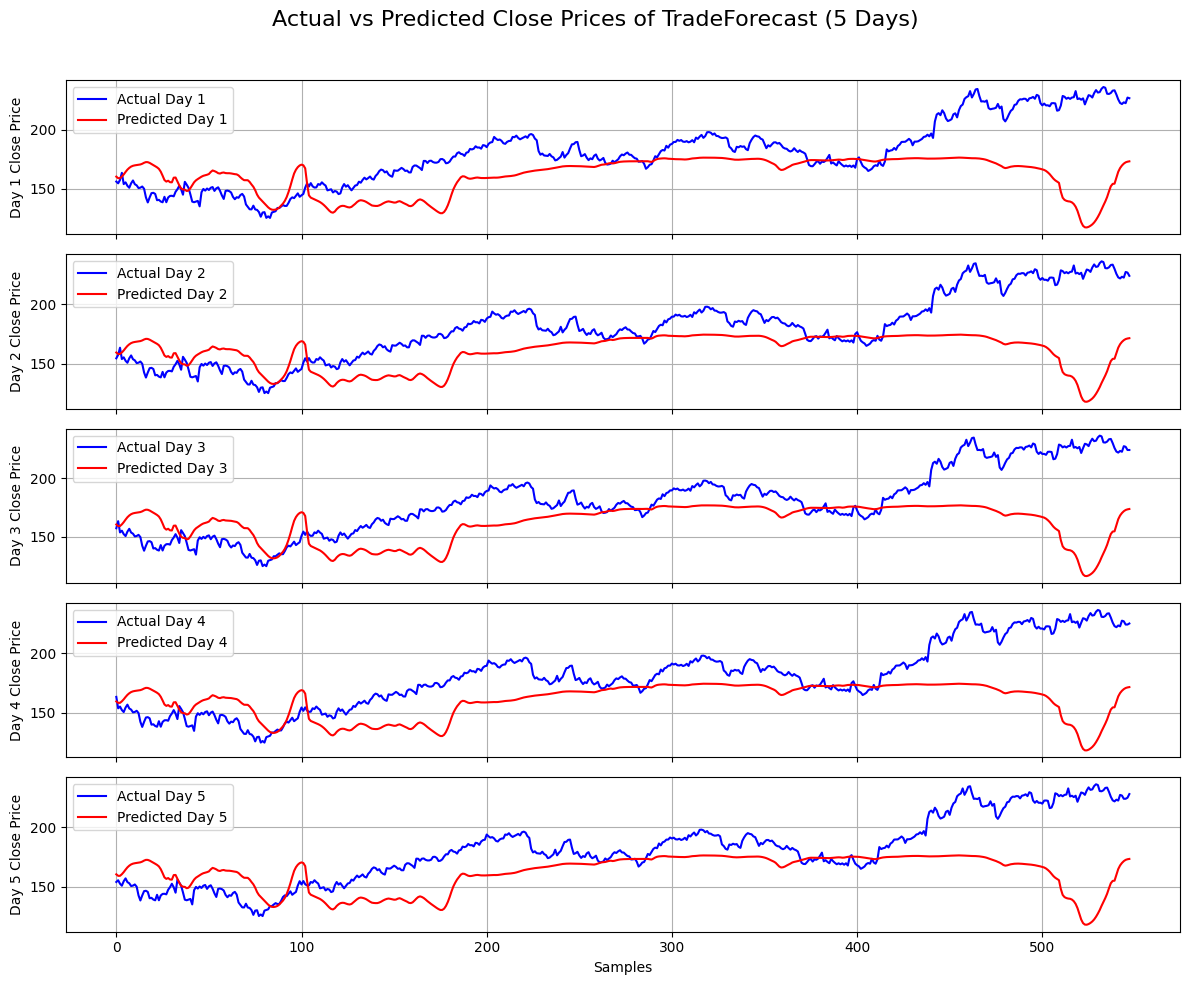

In [9]:
from tradeforecast.viz import plot_rnn_forecasts

plot_rnn_forecasts(y_arr, y_preds_arr)